In [ ]:
!pip install -U kaleido

In [8]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import os
import plotly.io as pio

In [10]:
df_tes = pd.read_csv('tesseract_experiment.csv')

df_tes['accuracy'] = df_tes['accuracy'].str.replace('%', '')
df_tes['accuracy'] = pd.to_numeric(df_tes['accuracy'])
df_tes['accuracy'] = df_tes['accuracy'] / 100



df_gv = pd.read_csv('google_vision_experiment.csv')

df_gv['accuracy'] = df_gv['accuracy'].str.replace('%', '')
df_gv['accuracy'] = pd.to_numeric(df_gv['accuracy'])
df_gv['accuracy'] = df_gv['accuracy'] / 100


In [11]:
df_tes.rename(columns={'accuracy': 'accuracy_ts'}, inplace=True)
df_gv.rename(columns={'accuracy': 'accuracy_gv'}, inplace=True)

merged_df = pd.merge(df_tes, df_gv, on=[col for col in df_tes.columns if col != 'accuracy_ts'])

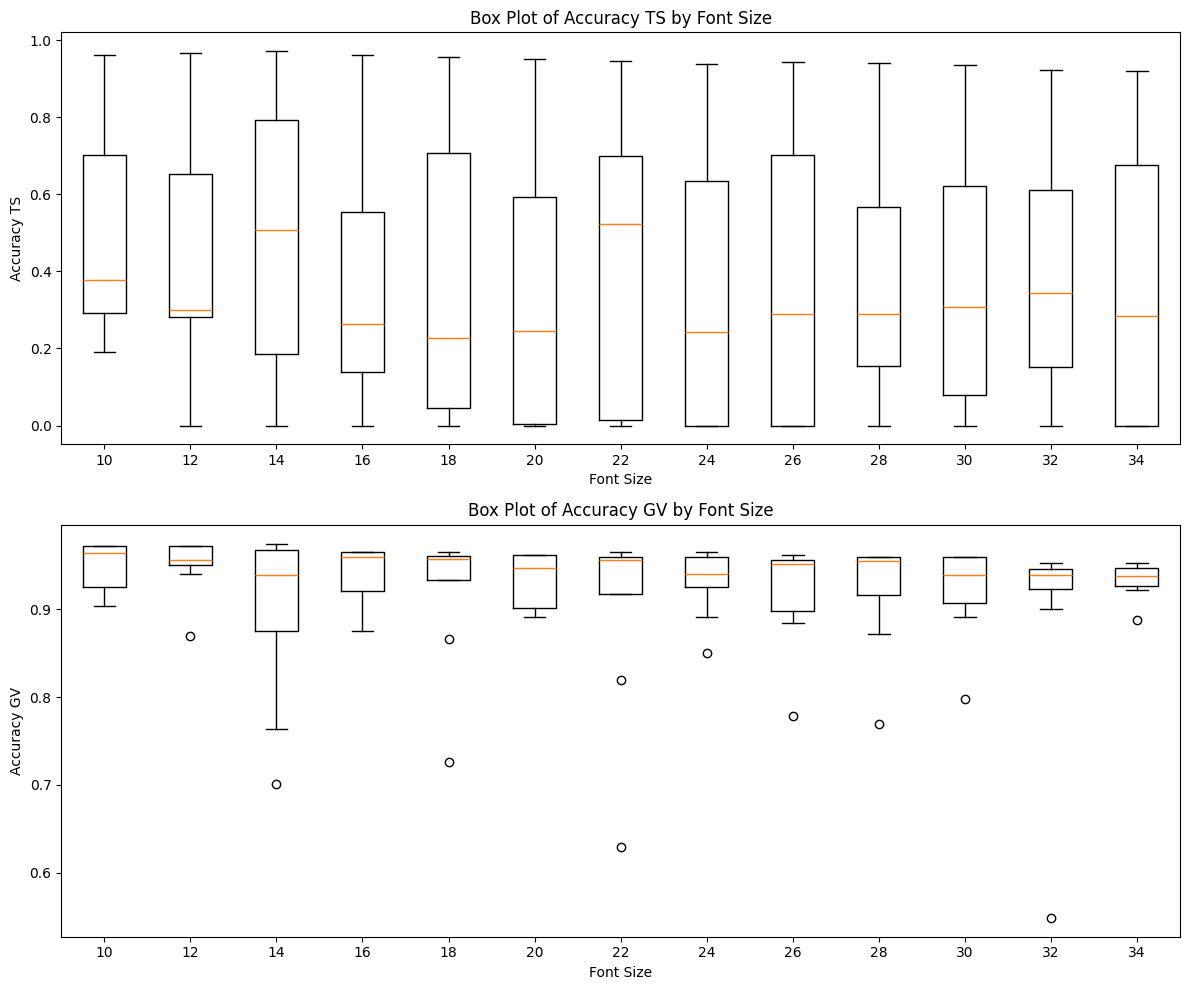

In [17]:
scripts_df = merged_df[merged_df['vox_atypl'] == 'scripts']

grouped_df = scripts_df.groupby(['font_size', 'underlined', 'bold']).agg({
    'accuracy_ts': ['mean', 'var'],
    'accuracy_gv': ['mean', 'var']
}).reset_index()

grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
grouped_df = grouped_df.rename(columns={'font_size_': 'font_size', 'underlined_': 'underlined', 'bold_': 'bold'})

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Box plot for accuracy_ts
axes[0].boxplot([scripts_df[scripts_df['font_size'] == size]['accuracy_ts'] for size in scripts_df['font_size'].unique()],
                labels=scripts_df['font_size'].unique())
axes[0].set_title('Box Plot of Accuracy TS by Font Size')
axes[0].set_xlabel('Font Size')
axes[0].set_ylabel('Accuracy TS')

# Box plot for accuracy_gv
axes[1].boxplot([scripts_df[scripts_df['font_size'] == size]['accuracy_gv'] for size in scripts_df['font_size'].unique()],
                labels=scripts_df['font_size'].unique())
axes[1].set_title('Box Plot of Accuracy GV by Font Size')
axes[1].set_xlabel('Font Size')
axes[1].set_ylabel('Accuracy GV')

plt.tight_layout()
plt.show()

TypeError: 'Axes' object is not subscriptable

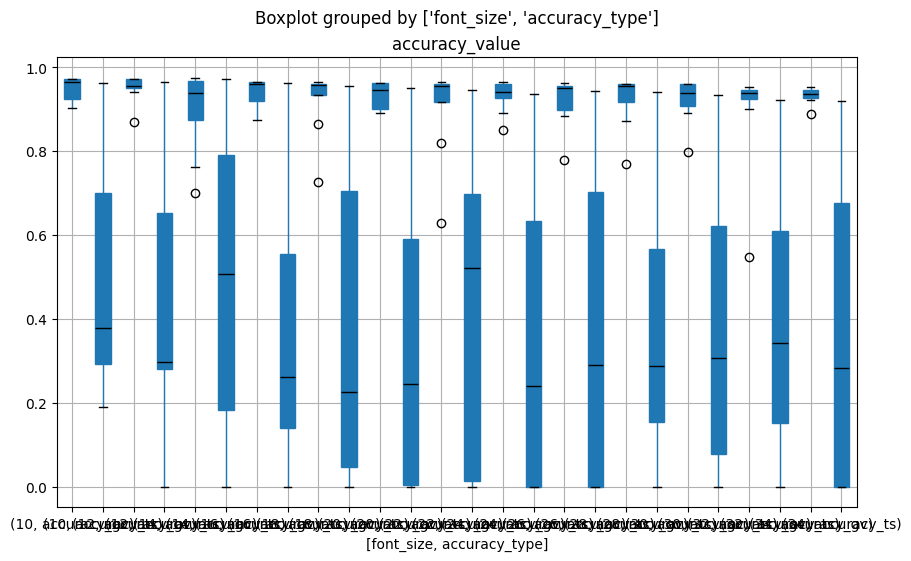

In [20]:
# Melting the DataFrame to long format
df_melted = scripts_df.melt(id_vars=['font_size'], value_vars=['accuracy_ts', 'accuracy_gv'],
                    var_name='accuracy_type', value_name='accuracy_value')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot
colors = ['#1f77b4', '#ff7f0e']  # Colors for accuracy_ts and accuracy_gv
box = df_melted.boxplot(column='accuracy_value', by=['font_size', 'accuracy_type'], 
                       ax=ax, patch_artist=True, 
                       boxprops=dict(facecolor=colors[0], color=colors[0]),
                       medianprops=dict(color='black'))

# Adjust colors for each box
for patch, accuracy_type in zip(box['boxes'], ['accuracy_ts', 'accuracy_gv']):
    patch.set_facecolor(colors.pop(0))

# Customize the plot
ax.set_title('Box Plot of Accuracy TS and GV by Font Size')
ax.set_xlabel('Font Size and Accuracy Type')
ax.set_ylabel('Accuracy Value')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

plt.tight_layout()
plt.show()